In [2]:
import networkx as nx
import konect2networkx as k2n

# param: internal name of the konect graph(string), number of generated ust graphs(int)
def konect_ust_matrix(name, number):
  G = k2n.get(name, download = True, logging = False)

  orig_edges = list(G.edges())
  res = [[0 for i in range(0, G.number_of_edges())] for j in range(number + 1)] 
    # range(number + 1) --> first row is the edgelist
    
  for i in range(G.number_of_edges()):
      res[0][i] = orig_edges[i]

  for i in range(1, number):
      tree = nx.random_spanning_tree(G, None)
      tree_edges = list(tree.edges())
      for j in range(G.number_of_edges()):
          found = 0
          k = 0
          while k in range(0, tree.number_of_edges())  and  found == 0:
            if orig_edges[j] == tree_edges[k]:
                res[i][j] = 1
                found = 1
            k += 1

  return res

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Eredeti gráf:


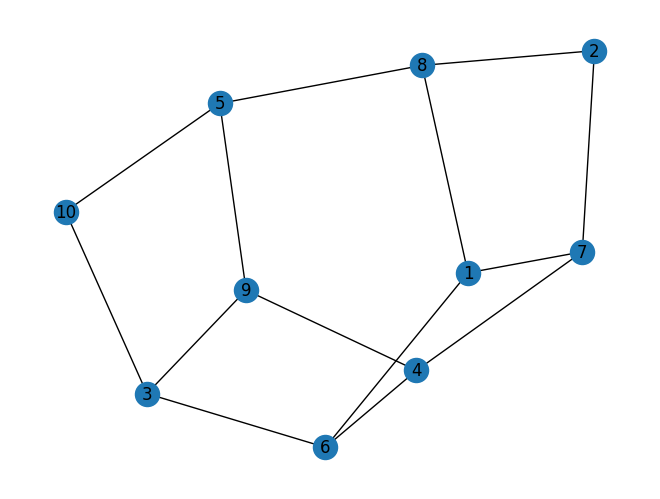

In [3]:
res = konect_ust_matrix('brunson_southern-women', 6)

print("\n")
for row in res:
  print(row)

G2 = nx.Graph()
G2.add_edges_from(res[0])
print("\nEredeti gráf:")
nx.draw(G2, with_labels=True)

In [4]:
def konect_ust_normalized(res):

  number_of_edges = len(res[0])
  number_of_ust = len(res)
  normal_res = [[0 for i in range(number_of_edges)] for j in range(2)]

  # copy edgelist of the original graph
  normal_res[0] = res[0]

  for i in range(1, number_of_ust):
    for j in range(number_of_edges):
      normal_res[1][j] += res[i][j]
   
  # normalization
  for j in range(number_of_edges):
    normal_res[1][j] = round(normal_res[1][j]/(number_of_ust-1), 3)

  return normal_res

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[0.5, 0.167, 0.0, 0.5, 0.167, 0.5, 0.167, 0.5, 0.333, 0.667, 0.167, 0.333, 0.833, 0.667]


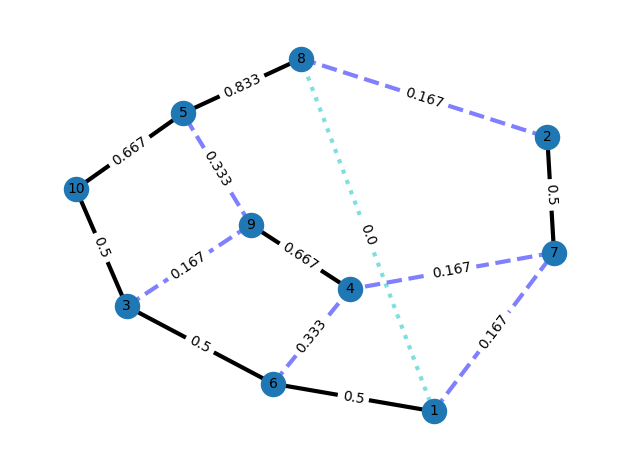

In [16]:
import matplotlib.pyplot as plt

normal_res = konect_ust_normalized(konect_ust_matrix('brunson_southern-women', 6))

print("\n")
for row in normal_res:
  print(row)

## drawing weighted graph

G = nx.Graph()
for j in range(len(normal_res[0])):
  G.add_edge(normal_res[0][j][0], normal_res[0][j][1], weight=normal_res[1][j] )

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0.5 and d["weight"] > 0.1]
enone = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.1]

pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed")
nx.draw_networkx_edges(G, pos, edgelist=enone, width=3, alpha=0.5, edge_color="c", style="dotted")

# node labels
nx.draw_networkx_labels(G, pos, font_size=12)

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()